Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
print(transactions.shape)
print(items.shape)
print(item_categories.shape)
print(shops.shape)



(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)


In [5]:
transactions.head(20)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [6]:
items.head(2)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [7]:
item_categories.head(2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1


In [8]:
shops.head(2)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [9]:
transactions.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [10]:
from datetime import datetime

In [11]:
transactions['trans_date']= pd.to_datetime(transactions['date'],format='%d.%m.%Y') 

In [12]:
transactions.dtypes

date                      object
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
trans_date        datetime64[ns]
dtype: object

In [13]:
#OBTAINING YEAR from TRANS_DATE

transactions['year']= pd.DatetimeIndex(transactions['trans_date']).year

In [14]:
#OBTAINING MONTH AND DAY FROM TRANS_DATE

transactions['month']= pd.DatetimeIndex(transactions['trans_date']).month
transactions['day']= pd.DatetimeIndex(transactions['trans_date']).day

In [15]:
## Obtaining total cost of price sold
transactions['total_revenue']= transactions.item_price*transactions.item_cnt_day

In [16]:
transactions.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,trans_date,year,month,day,total_revenue
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,2013,1,2,999.00
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,2013,1,3,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,2013,1,5,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,2013,1,6,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,2013,1,15,1099.00
5,10.01.2013,0,25,2564,349.00,1.0,2013-01-10,2013,1,10,349.00
6,02.01.2013,0,25,2565,549.00,1.0,2013-01-02,2013,1,2,549.00
7,04.01.2013,0,25,2572,239.00,1.0,2013-01-04,2013,1,4,239.00
8,11.01.2013,0,25,2572,299.00,1.0,2013-01-11,2013,1,11,299.00
9,03.01.2013,0,25,2573,299.00,3.0,2013-01-03,2013,1,3,897.00


In [17]:
#SUBSETTING only year 2014 and month =9 in a separate dataframe
trans_sep=transactions[(transactions.year==2014)&(transactions.month==9)]

In [18]:
trans_sep.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,total_revenue
count,73157.0,73157.000000,73157.000000,73157.000000,73157.000000,73157.0,73157.0,73157.000000,73157.000000
mean,20.0,33.656943,10111.880025,1057.381811,1.356097,2014.0,9.0,15.710732,1568.183413
std,0.0,16.167844,6231.631121,2139.235957,2.134580,0.0,0.0,8.536536,5699.946283
min,20.0,2.000000,0.000000,3.000000,-3.000000,2014.0,9.0,1.000000,-20990.000000
25%,20.0,24.000000,4750.000000,299.000000,1.000000,2014.0,9.0,8.000000,299.000000
50%,20.0,31.000000,8766.000000,499.000000,1.000000,2014.0,9.0,15.000000,529.000000
75%,20.0,48.000000,15470.000000,1102.400000,1.000000,2014.0,9.0,23.000000,1348.500000
max,20.0,59.000000,22167.000000,30600.000000,149.000000,2014.0,9.0,30.000000,699972.000000


In [19]:
trans_sep[(trans_sep.item_cnt_day<=0)].head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,trans_date,year,month,day,total_revenue
1954265,17.09.2014,20,4,5591,1590.0,-1.0,2014-09-17,2014,9,17,-1590.0
1954274,23.09.2014,20,4,5657,4490.0,-1.0,2014-09-23,2014,9,23,-4490.0
1954294,18.09.2014,20,4,5814,1199.0,-1.0,2014-09-18,2014,9,18,-1199.0
1954306,23.09.2014,20,4,5669,3190.0,-1.0,2014-09-23,2014,9,23,-3190.0
1955145,13.09.2014,20,5,7342,299.0,-1.0,2014-09-13,2014,9,13,-299.0


In [20]:
trans_group = trans_sep.groupby('shop_id')[['total_revenue']].sum()

In [21]:
trans_group.head(2)

,total_revenue
shop_id,
2,1473540.0
3,1228425.0


In [22]:
maxAmount=max(trans_group.total_revenue)

In [23]:
print(maxAmount)

7982852.2


In [24]:
# YOUR CODE GOES HERE
max_revenue = maxAmount
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [25]:
transactions.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,trans_date,year,month,day,total_revenue
0,02.01.2013,0,59,22154,999.0,1.0,2013-01-02,2013,1,2,999.0
1,03.01.2013,0,25,2552,899.0,1.0,2013-01-03,2013,1,3,899.0


In [26]:
tran_summer = transactions[(transactions.year==2014)&(transactions.month>=6)&(transactions.month<=8)]

In [27]:
tran_summer.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,trans_date,year,month,day,total_revenue
1705909,15.06.2014,17,26,9532,399.00,1.0,2014-06-15,2014,6,15,399.00
1705910,10.06.2014,17,26,9507,149.00,1.0,2014-06-10,2014,6,10,149.00
1705911,13.06.2014,17,26,9509,246.32,1.0,2014-06-13,2014,6,13,246.32
1705912,03.06.2014,17,26,9532,399.00,1.0,2014-06-03,2014,6,3,399.00
1705913,08.06.2014,17,26,9532,399.00,1.0,2014-06-08,2014,6,8,399.00


In [28]:
tran_summer.month.unique()

array([6, 7, 8])

In [29]:
high_rev=tran_summer.groupby('item_id')[['total_revenue']].sum().sort_values(by='total_revenue',ascending = False)\
.reset_index()

In [30]:
high_rev.head(5)

,item_id,total_revenue
0,6675,28485361.70
1,16790,8018209.20
2,3928,3768552.05
3,7807,3740806.20
4,7172,3356949.20


In [31]:
item_high_rev=high_rev.item_id[0]

In [32]:
item_high_rev

6675

## Aayushi Trial

In [33]:
item_tran = pd.merge(tran_summer,items, how='inner', on = 'item_id')
item_tran.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,trans_date,year,month,day,total_revenue,item_name,item_category_id
0,15.06.2014,17,26,9532,399.0,1.0,2014-06-15,2014,6,15,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1,03.06.2014,17,26,9532,399.0,1.0,2014-06-03,2014,6,3,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
2,08.06.2014,17,26,9532,399.0,1.0,2014-06-08,2014,6,8,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
3,11.06.2014,17,26,9532,399.0,1.0,2014-06-11,2014,6,11,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
4,19.06.2014,17,26,9532,399.0,1.0,2014-06-19,2014,6,19,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [34]:
rev_cat=item_tran.groupby('item_category_id')[['total_revenue']].sum().sort_values(by='total_revenue',ascending = False)\
.reset_index()
rev_cat.head(5)

,item_category_id,total_revenue
0,20,32157302.43
1,12,31385229.70
2,19,26237112.15
3,23,19896624.03
4,30,15876623.34


In [35]:
high_rev_cat=rev_cat.item_category_id[0]

In [36]:
high_rev_cat

20

In [37]:
## ================



## ================

In [38]:
items.head(2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [39]:
catmaxrev_df=items[items.item_id==item_high_rev]

In [40]:
catmaxrev_df.head()

,item_name,item_id,item_category_id
6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,6675,12


In [41]:
cat_max_rev=catmaxrev_df.item_category_id[6675]

In [42]:
print(cat_max_rev)

12


In [43]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = high_rev_cat
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [44]:
items.head(2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [45]:
item_categories.head(2)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1


In [46]:
shops.head(2)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


In [47]:
titem = transactions.drop_duplicates(["item_id", "item_price"])

In [48]:
tf=pd.DataFrame(titem.groupby('item_id').item_price.size())

In [49]:
type(tf)

pandas.core.frame.DataFrame

In [50]:
tf.head(2)

,item_price
item_id,
0,1
1,1


In [51]:
tx=tf[tf.item_price==1]

In [52]:
tx.head(5)

,item_price
item_id,
0,1
1,1
2,1
4,1
5,1


In [53]:
const_price=len(tx)

In [54]:
# YOUR CODE GOES HERE

num_items_constant_price = const_price
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [55]:
sid=transactions[transactions.shop_id==25]

In [56]:
sid.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,trans_date,year,month,day,total_revenue
1,03.01.2013,0,25,2552,899.0,1.0,2013-01-03,2013,1,3,899.0
2,05.01.2013,0,25,2552,899.0,-1.0,2013-01-05,2013,1,5,-899.0


In [57]:
sid=sid[(sid.year==2014)&(sid.month==12)]

In [78]:
sid[sid.item_cnt_day < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,trans_date,year,month,day,total_revenue
2318777,25.12.2014,23,25,20831,1999.0,-1.0,2014-12-25,2014,12,25,-1999.0
2319563,07.12.2014,23,25,16017,389.0,-1.0,2014-12-07,2014,12,7,-389.0
2320292,21.12.2014,23,25,3933,2099.0,-1.0,2014-12-21,2014,12,21,-2099.0
2320486,18.12.2014,23,25,3557,1999.0,-1.0,2014-12-18,2014,12,18,-1999.0
2320516,06.12.2014,23,25,3584,1449.0,-1.0,2014-12-06,2014,12,6,-1449.0
2320672,27.12.2014,23,25,5106,499.0,-1.0,2014-12-27,2014,12,27,-499.0
2320739,14.12.2014,23,25,4997,3199.0,-1.0,2014-12-14,2014,12,14,-3199.0
2320786,27.12.2014,23,25,5153,559.0,-1.0,2014-12-27,2014,12,27,-559.0
2321016,27.12.2014,23,25,4608,1199.0,-1.0,2014-12-27,2014,12,27,-1199.0
2321137,24.12.2014,23,25,2875,849.0,-1.0,2014-12-24,2014,12,24,-849.0


In [59]:
sid.day.value_counts(sort = True)

30    1022
27     542
31     517
28     446
26     422
20     399
25     376
24     334
19     315
13     315
21     294
23     293
6      281
14     246
7      239
22     239
18     234
12     231
17     229
5      227
15     181
8      179
11     174
9      165
3      151
16     151
4      128
1      123
10     116
2      115
Name: day, dtype: int64

In [60]:
sid.day.nunique()

30

In [61]:
print(sid.isnull().sum())

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
trans_date        0
year              0
month             0
day               0
total_revenue     0
dtype: int64


In [62]:
solditm_df=sid.groupby('day')[['item_id']].count().reset_index()

In [63]:
solditm_df.head()

,day,item_id
0,1,123
1,2,115
2,3,151
3,4,128
4,5,227


In [81]:
sid.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,trans_date,year,month,day,total_revenue
2295837,14.12.2014,23,25,21752,399.0,1.0,2014-12-14,2014,12,14,399.0
2295838,13.12.2014,23,25,21752,399.0,3.0,2014-12-13,2014,12,13,1197.0
2295839,26.12.2014,23,25,21733,149.0,1.0,2014-12-26,2014,12,26,149.0
2295840,31.12.2014,23,25,21732,149.0,1.0,2014-12-31,2014,12,31,149.0
2295841,30.12.2014,23,25,21726,149.0,1.0,2014-12-30,2014,12,30,149.0


In [83]:
solditm_df1=sid.groupby(['day'])['item_cnt_day'].sum().reset_index()
solditm_df1.head()

,day,item_cnt_day
0,1,153.0
1,2,169.0
2,3,195.0
3,4,164.0
4,5,300.0


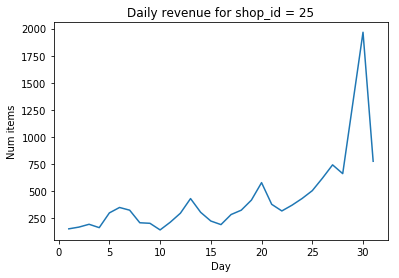

In [84]:
#shop_id = 25
total_num_items_sold = solditm_df1.item_cnt_day
days = solditm_df1.day

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()


In [86]:
total_item_var1=solditm_df1.item_cnt_day.var(ddof=1)

In [87]:
total_num_items_sold_var = round(total_item_var1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

Current answer for task total_num_items_sold_var is: 117168.0


In [64]:
#No_days=len(sid.day.unique())
#print(No_days)

In [65]:
#sid.head(10)

In [66]:
# arr=[]

In [67]:
# arr.append(1)

In [68]:
# arr

In [69]:
# arr=[]
# for day in solditm_df.day:
#     arr.append(day)

In [70]:
#arr

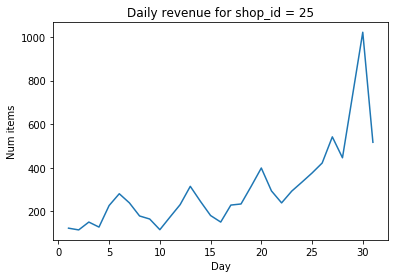

In [71]:
#shop_id = 25
total_num_items_sold = solditm_df.item_id
days = solditm_df.day

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()



In [72]:
total_item_var=solditm_df.item_id.var(ddof=1)

In [73]:
total_num_items_sold_var = round(total_item_var)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

Current answer for task total_num_items_sold_var is: 32537.0


## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [88]:
STUDENT_EMAIL = 'vedprakash.nitjsr@gmail.com'
STUDENT_TOKEN = 'vJLv5QNmghuRRzzc'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117168.0


In [89]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)